# SURFO's data representation
The SURFO system outputs a continuous stream of digitized time-series.
Each time series is physically triggered by a "pulse", a short light signals propagating through the optical fiber.
For this reason we usually refer to these time-series as "pulses".

Pulses are repeated, typically at ~1kHz. Each time series is virtually stacked along what we refer to as the "time axis".

As such, the data is best represented as a 2D matrix, representing spatio-temporal data.

When representing the data in 2D, we then consider the following axis:
- **axis 0 -> "time axis"**, each index represents a new time series (or pulse), separated in time by ~1/1kHz = 1ms
- **axis 1 -> "space axis"**, each index represents a location along the optical fiber. Indexes separation depends on multiple factors and usually is on the order of 10 meters

We call this representation a "waterfall".

As the acquisition goes, the length of the time axis increases linearly with time (corresponding to stacking time-series/pulses).
The length of the space axis is fixed (~corresponding to the length of the fiber).

To avoid saving massive files, we usually write the data in a new file every ~5min.

# SURFO data format
Data has been converted to HDF5 format.
Metadata attributes are not yet fixed, and we will provide you with a schema as soon as possible. <br>
[current metadata contains timing-related information. To be updated soon...]

Note that the data shared is already preprocessed and is not "raw".
Data present in the array is the phase variation of the raw time series. <br>
The pipeline steps used to go from raw to present data are: <br>
- 1: Compute signal phase from raw data
- 2: Downsampling along the time axis (factor 10)
- 3: Butterworth Filter along the time axis
- 4: FIRBandpass filter
- 5: Median Filter (normalization w/ median)

# File naming and metadata
Until we set the metadata schema, some information can be gathered from the file names. <br>
Typical filenames include: ```acquisition-date_pulse-frequency_spatial-resolution_filenumber.hdf5```<br>
e.g. ```2023_07_21_Frep_2kHz_RES_10m_1```

# Loading HDF5 files
You may read the HDF5 data anyway you prefer. Please find below an example of reading the data using the h5py Python package. Hdf5 files contain both the matrix data and their metadata. Both can be accessed by performing:

In [1]:
import h5py

fname = "/data_int/deel/2023_07_21_Frep_2kHz_RES_10m/2023_07_21_Frep_2kHz_RES_10m_1.hdf5"
with h5py.File(fname, "r") as file:
    mat = file["data"]  # matrix data
    metadata = file.attrs  # metadata hashmap
    print(mat)
    print(metadata.keys())

<HDF5 dataset "data": shape (30000, 45326), type "<f4">
<KeysViewHDF5 ['dt', 'dx', 'end_cell', 'end_pulse', 'file_path', 'model', 'sample_freq', 'start_cell', 'start_pulse', 't_zero', 'version']>


# XDAS

We suggest you start by reading and processing data using XDAS.

XDAS is an open source framework dedicated to Distributed Acoustic Sensor (DAS) data.
XDAS offers interfaces to read large DAS HDF5 files (with lazy-loading), a lot of signal processing functions and is well optimized.

Browsing through XDAS documentation will give you a good idea of transforms often used in DAS signal processing.

https://xdas.readthedocs.io/en/latest/ <br>
https://github.com/xdas-dev/xdas <br>
https://github.com/xdas-dev/tutorials <br>

Most of this tutorial content is from: https://xdas.readthedocs.io/en/latest/getting-started.html


To enable using XDAS on SURFO data, we provide you with two readers, allowing you to read single or multiple files. These are simply wrappers around the h5py and Xarray packages. The interface is similar to that of the File object created by h5py.

In [2]:
# Loading a single file with xdas compatibility
from deelxsurfo.loaders.xdas_loaders import read_surfo

fname = "/data_int/deel/2023_07_21_Frep_2kHz_RES_10m/2023_07_21_Frep_2kHz_RES_10m_1.hdf5"
source = read_surfo(fname)

# The returned object is an instance of xdas.DataArray, the "source"
print("data source: ", source)

# Metadata are stored in the attrs attribute (a dict)
print("metadata: ", source.attrs)

# Displaying the source shape
print("shape: ", source.shape)


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/home/antoine/micromamba/envs/hpmv/lib/python3.11/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/home/antoine/micromamba/envs/hpmv/lib/python3.11/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  File "/home/antoine/micromamba/envs/hpmv/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 739, in start
    self

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/home/antoine/micromamba/envs/hpmv/lib/python3.11/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/home/antoine/micromamba/envs/hpmv/lib/python3.11/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  File "/home/antoine/micromamba/envs/hpmv/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 739, in start
    self

AttributeError: _ARRAY_API not found

2024-10-15 13:20:29,900 - hdf5plugin._utils - DEBUG - Registered filter: bshuf (/home/antoine/micromamba/envs/hpmv/lib/python3.11/site-packages/hdf5plugin/plugins/libh5bshuf.so)
2024-10-15 13:20:29,901 - hdf5plugin._utils - DEBUG - Registered filter: blosc (/home/antoine/micromamba/envs/hpmv/lib/python3.11/site-packages/hdf5plugin/plugins/libh5blosc.so)
2024-10-15 13:20:29,902 - hdf5plugin._utils - DEBUG - Registered filter: blosc2 (/home/antoine/micromamba/envs/hpmv/lib/python3.11/site-packages/hdf5plugin/plugins/libh5blosc2.so)
2024-10-15 13:20:29,903 - hdf5plugin._utils - DEBUG - Registered filter: bzip2 (/home/antoine/micromamba/envs/hpmv/lib/python3.11/site-packages/hdf5plugin/plugins/libh5bzip2.so)
2024-10-15 13:20:29,904 - hdf5plugin._utils - DEBUG - Registered filter: fcidecomp (/home/antoine/micromamba/envs/hpmv/lib/python3.11/site-packages/hdf5plugin/plugins/libh5fcidecomp.so)
2024-10-15 13:20:29,905 - hdf5plugin._utils - DEBUG - Registered filter: lz4 (/home/antoine/micromam

data source:  <xdas.DataArray (time: 30000, distance: 45326)>
VirtualSource: 5.1GB (float32)
Coordinates:
  * time (time): 2024-10-09T16:30:09.000 to 2024-10-09T16:35:08.990
  * distance (distance): 0.000 to 453250.000
metadata:  {'t_zero': np.datetime64('2024-10-09T16:30:09.000000000'), 'dt': np.timedelta64(10000000,'ns'), 'dx': np.float64(10.0)}
shape:  (30000, 45326)


# Serialize into numpy arrays
XDAS provides a quick interface with numpy arrays. To serialize into numpy array, you may slice the source and then apply ```np.asarray()``` on the source.

To avoid writing the entire file to memory, you should slice the data array first and then convert it to numpy. Rather than the opposite.

In [3]:
# Slicing and pushing to numpy array
import numpy as np

sliced_data = source[1000::, 1000:1200]
sliced_data = np.asarray(sliced_data)
print("sliced_data : \n", sliced_data)

sliced_data : 
 [[ 1.5714929e-02  1.7180564e-02  1.7448021e-02 ...  2.9652240e-02
   2.9652240e-02  2.9652240e-02]
 [-2.6133759e-02 -2.4879938e-02 -2.4355322e-02 ... -5.4812919e-02
  -5.4345571e-02 -4.7501590e-02]
 [-6.4592566e-03 -6.4592566e-03 -6.4592566e-03 ... -2.1474648e-02
  -2.1474648e-02 -2.1474648e-02]
 ...
 [-3.5350558e-03 -2.8884422e-03 -2.3447992e-03 ...  3.7473633e-03
   3.2471872e-03  2.0351708e-03]
 [ 2.5845270e-03  2.5845270e-03 -7.1787254e-05 ...  6.2830178e-03
   8.1707333e-04  8.1707333e-04]
 [-3.1699138e-03 -3.1699138e-03  4.7415387e-04 ... -2.6116732e-03
  -2.4670465e-03 -1.9132927e-03]]


In [4]:
# Other useful methods are available
print("max: ", source.max())
print("min: ", source.min())

max:  <xdas.DataArray ()>
np.float32(16.771261)
min:  <xdas.DataArray ()>
np.float32(-16.127918)


# Loading multiple files
As mentioned, a new file is being written at every fixed interval (typically on the order of a minute).
Data arising from the same measurement campaign (same DAS setup, with the same parameters and consecutive in time) can be treated as a single object.

XDAS offers the possiblity of time-stacking multiple HDF5 file, producing a "virtual file". The virtual file is an XArray object and offers a numpy-friendly API over multiple files.

We may target the folder containing the following files:
- **2023_07_21_Frep_2kHz_RES_10m_1.hdf5**
- **2023_07_21_Frep_2kHz_RES_10m_2.hdf5**
- **2023_07_21_Frep_2kHz_RES_10m_3.hdf5**
- **2023_07_21_Frep_2kHz_RES_10m_4.hdf5**
- **2023_07_21_Frep_2kHz_RES_10m_5.hdf5**
- **2023_07_21_Frep_2kHz_RES_10m_6.hdf5**
- **2023_07_21_Frep_2kHz_RES_10m_7.hdf5**
- **2023_07_21_Frep_2kHz_RES_10m_8.hdf5**
- **2023_07_21_Frep_2kHz_RES_10m_9.hdf5**
- **2023_07_21_Frep_2kHz_RES_10m_10.hdf5**
- **2023_07_21_Frep_2kHz_RES_10m_11.hdf5**
- **2023_07_21_Frep_2kHz_RES_10m_12.hdf5**

This is done using a wildcard: **2023_07_21_Frep_2kHz_RES_10m_*.hdf5** <br>
And the ```xdas_dataarray()``` loader.

In [5]:
from deelxsurfo.loaders.xdas_loaders import xdas_dataarray

# We read multiple files using xdas_dataarray() with a wildcard
file_wildcard = "/data_int/deel/2023_07_21_Frep_2kHz_RES_10m/2023_07_21_Frep_2kHz_RES_10m_*.hdf5"
source_multiple_files = xdas_dataarray(file_wildcard=file_wildcard)

# The returned object is also an instance of xdas.DataArray
print("data source: ", source_multiple_files)

# Source is sliced and pushed to memory in an identical fashion
sliced_data = source_multiple_files[1000::, 1000:1200]
sliced_data = np.asarray(sliced_data)  # at this point the data is written in memory
print("sliced data: \n", sliced_data)
print("sliced shape: ", sliced_data.shape)

data source:  <xdas.DataArray (time: 360000, distance: 45326)>
VirtualStack: 60.8GB (float32)
Coordinates:
  * time (time): 2024-10-09T16:30:09.000 to 2024-10-09T17:30:08.990
  * distance (distance): 0.000 to 453250.000
sliced data: 
 [[ 0.01571493  0.01718056  0.01744802 ...  0.02965224  0.02965224
   0.02965224]
 [-0.02613376 -0.02487994 -0.02435532 ... -0.05481292 -0.05434557
  -0.04750159]
 [-0.00645926 -0.00645926 -0.00645926 ... -0.02147465 -0.02147465
  -0.02147465]
 ...
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]
sliced shape:  (359000, 200)


Using this loader, you may slice the source over multiple files as if they were a single file.

In [6]:
# You may requests slices spanning over multiple files!
sliced_data = source_multiple_files[:, 1000:1002]  # all pulses, 2 cells
sliced_data = np.asarray(sliced_data)
print("sliced data: \n", sliced_data)
print("sliced shape: ", sliced_data.shape)

sliced data: 
 [[9.4463445e-07 1.1827026e-06]
 [2.5457498e-06 4.8212196e-06]
 [2.2652435e-05 2.1934176e-05]
 ...
 [0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00]]
sliced shape:  (360000, 2)


Note:
For now, the end of the last file is filled with zero. This will be corrected in the near future...

# Time slicing
You may also slice virtual data using time stamps.
Printing the source metadata will show you timing (and distances) information.

In [7]:
file_wildcard = "/data_int/deel/2023_07_21_Frep_2kHz_RES_10m/2023_07_21_Frep_2kHz_RES_10m_*.hdf5"
source_multiple_files = xdas_dataarray(file_wildcard=file_wildcard)
print(source_multiple_files)

<xdas.DataArray (time: 360000, distance: 45326)>
VirtualStack: 60.8GB (float32)
Coordinates:
  * time (time): 2024-10-09T16:30:09.000 to 2024-10-09T17:30:08.990
  * distance (distance): 0.000 to 453250.000


These files (60GB) represent ~1hour of data. You may then use these timestamps for slicing:

In [8]:
# selecting ~0.1 second of data (~100 pulses with dt = 1ms), and 2meters
selected = source_multiple_files.sel(
    time=slice("2024-10-09T16:32:09.000", "2024-10-09T16:45:12.000"),
    distance=slice(10000, 30000),
)
print(selected)
print(np.asarray(selected))

<xdas.DataArray (time: 78301, distance: 2001)>
VirtualStack: 597.7MB (float32)
Coordinates:
  * time (time): 2024-10-09T16:32:09.000 to 2024-10-09T16:45:12.000
  * distance (distance): 10000.000 to 30000.000
[[ 0.00430465  0.00635707  0.00857452 ... -0.03495849 -0.03319049
  -0.02895268]
 [-0.00557162 -0.00483132 -0.00423586 ... -0.01404151 -0.01404151
  -0.01404151]
 [-0.00538521 -0.00722681 -0.00867815 ...  0.03435184  0.03435184
   0.03435184]
 ...
 [ 0.12198565  0.14594395  0.35418952 ...  0.01759113  0.01712527
   0.01695256]
 [-0.10280155 -0.22913255 -0.34808773 ... -0.02584488 -0.02157896
  -0.01790043]
 [ 0.07588209  0.08239967  0.1495862  ...  0.00203056 -0.0004677
  -0.00419176]]


Note:
As of now, our proprocessing pipeline does not output real time stamps. The absolute times are therefore meaningless, only the time deltas are correct. This will be changed in the near future...

# Plotting
XDAS offers an out-of-the-box plotting method with matplotlib's backend.

2024-10-15 13:21:07,262 - matplotlib - DEBUG - matplotlib data path: /home/antoine/micromamba/envs/hpmv/lib/python3.11/site-packages/matplotlib/mpl-data
2024-10-15 13:21:07,270 - matplotlib - DEBUG - CONFIGDIR=/home/antoine/.config/matplotlib
2024-10-15 13:21:07,284 - matplotlib - DEBUG - interactive is False
2024-10-15 13:21:07,285 - matplotlib - DEBUG - platform is linux
2024-10-15 13:21:07,593 - matplotlib - DEBUG - CACHEDIR=/home/antoine/.cache/matplotlib
2024-10-15 13:21:07,595 - matplotlib.font_manager - DEBUG - Using fontManager instance from /home/antoine/.cache/matplotlib/fontlist-v390.json
2024-10-15 13:21:07,740 - matplotlib.pyplot - DEBUG - Loaded backend module://matplotlib_inline.backend_inline version unknown.
2024-10-15 13:21:07,743 - matplotlib.pyplot - DEBUG - Loaded backend module://matplotlib_inline.backend_inline version unknown.
2024-10-15 13:21:07,746 - matplotlib.font_manager - DEBUG - findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stre

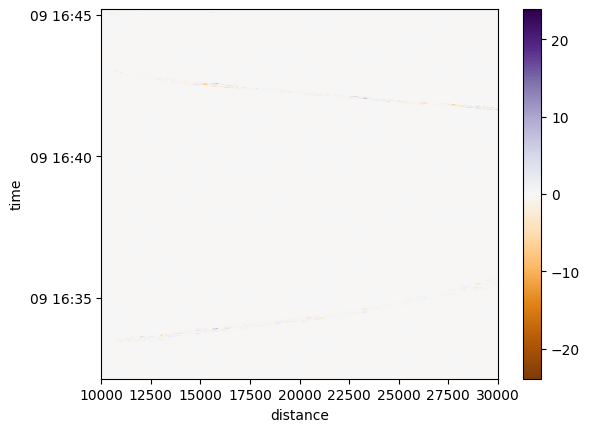

In [9]:
selected.plot(cmap="PuOr")

# Transforming/Processing data
You may wish to apply processing function in your ML pipelines.

XDAS provides an interface compatible with most Numpy and Scipy methods.
A good tutorial can be found here: https://xdas.readthedocs.io/en/latest/getting-started.html

As mentioned earlier, you do not have to process the data using XDAS, however you may want to explore it a little to better understand the kind of transformations we typically apply to the data.

Another interesting feature of XDAS: transformations automatically update the sample's metadata (e.g. timestamps), so that you do not have to track/update them yourself. This is particularly useful when decimating data, splitting into datasets etc... This will depend on your usecase.

XDAS claims some pretty good runtime optimization, although I never actually profiled anything from the package.

2024-10-15 13:21:14,620 - matplotlib.colorbar - DEBUG - locator: <matplotlib.ticker.AutoLocator object at 0x7f946051d190>


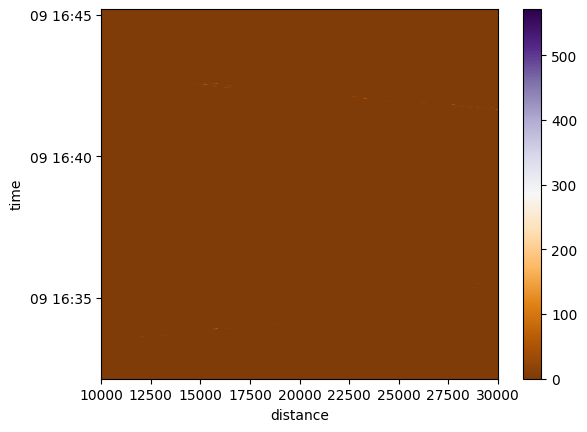

In [10]:
# You may apply most numpy functions and methods
file_wildcard = "/data_int/deel/2023_07_21_Frep_2kHz_RES_10m/2023_07_21_Frep_2kHz_RES_10m_*.hdf5"
source = xdas_dataarray(file_wildcard=file_wildcard)
squared = np.square(selected)
squared.plot(cmap="PuOr")

2024-10-15 13:21:19,174 - matplotlib.colorbar - DEBUG - locator: <matplotlib.ticker.AutoLocator object at 0x7f945fad7d50>


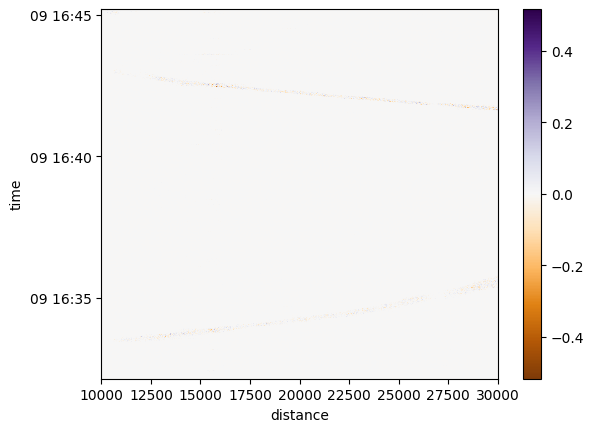

In [11]:
# Scipy methods are also available
import xdas.signal as xs

decimated = xs.decimate(selected, 2, ftype="fir", dim="distance", parallel=None)
decimated = xs.decimate(decimated, 10, ftype="iir", dim="time", parallel=8)
decimated.plot(cmap="PuOr")

In [12]:
# Xdas also has its own implementations, which enable you to use string description for axes
import xdas

mean = xdas.mean(selected, "time")
std = selected.std("time")
print("mean: ", mean)
print("std: ", std)

mean:  <xdas.DataArray (distance: 2001)>
[ 9.531003e-06 -2.292434e-06 -7.088931e-06 ... -1.108262e-05 -1.199014e-05
  3.553930e-05]
Coordinates:
  * distance (distance): 10000.000 to 30000.000
std:  <xdas.DataArray (distance: 2001)>
[0.023369 0.024124 0.025364 ... 0.255938 0.262063 0.266718]
Coordinates:
  * distance (distance): 10000.000 to 30000.000


# Processing pipelines
XDAS provides an optimized pipeline API...

2024-10-15 13:21:22,228 - matplotlib.colorbar - DEBUG - locator: <matplotlib.ticker.AutoLocator object at 0x7f9460253ed0>


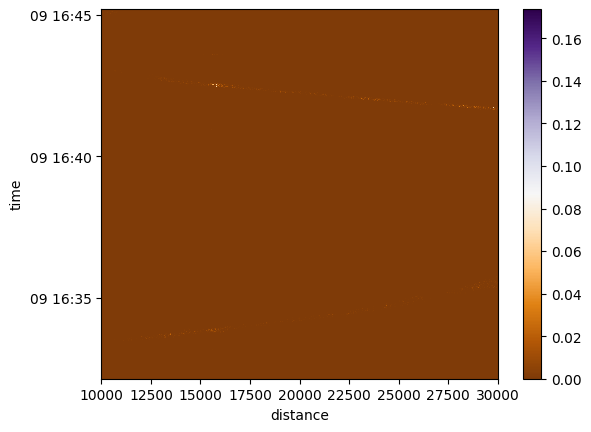

In [13]:
# The simplest implementation of a pipeline...

import xdas.signal as xs
from scipy.signal import iirfilter

b, a = iirfilter(4, 0.1, btype="high")


def process(da):
    da = xs.decimate(da, 2, ftype="fir", dim="distance")
    da = xs.decimate(da, 10, ftype="fir", dim="time")
    da = xs.lfilter(b, a, da, dim="time")
    da = np.square(da)
    return da

output = process(selected)
output.plot(cmap="PuOr")

# Massive processing using Atoms
To deal with huge datasets, XDAS introduces Atom objects.

2024-10-15 13:21:23,748 - matplotlib.colorbar - DEBUG - locator: <matplotlib.ticker.AutoLocator object at 0x7f946010aad0>


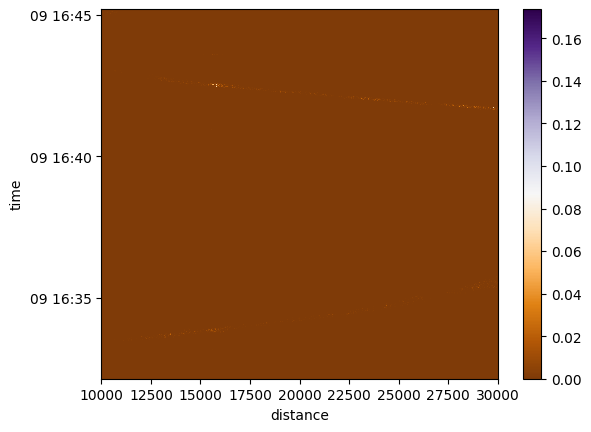

In [14]:
# This is the prefered way to implement a pipeline...

from xdas.atoms import LFilter, Partial, Sequential
from xdas.processing import process

# defining a pipeline using "atom":
atom = Sequential(
    [
        Partial(xs.decimate, 2, ftype="fir", dim="distance"),
        Partial(xs.decimate, 10, ftype="fir", dim="time"),
        LFilter(b, a, dim="time"),
        np.square,
    ]
)
output_atomic = atom(selected)
output_atomic.plot(cmap="PuOr")

# Processing data chunk by chunk
If your data is larger than memory, XDAS provides dataloaders (iterator). Let's use the dataloader to process 10'000 pulses, in chunks of 2000 pulses.

2024-10-15 13:21:27,409 - matplotlib.colorbar - DEBUG - locator: <matplotlib.ticker.AutoLocator object at 0x7f9460191d10>


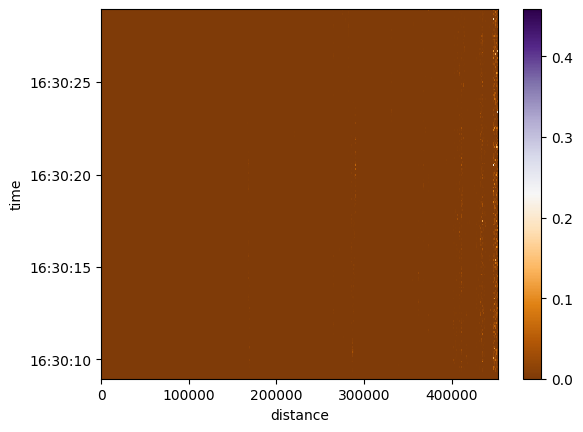

2024-10-15 13:21:28,188 - matplotlib.colorbar - DEBUG - locator: <matplotlib.ticker.AutoLocator object at 0x7f94601650d0>


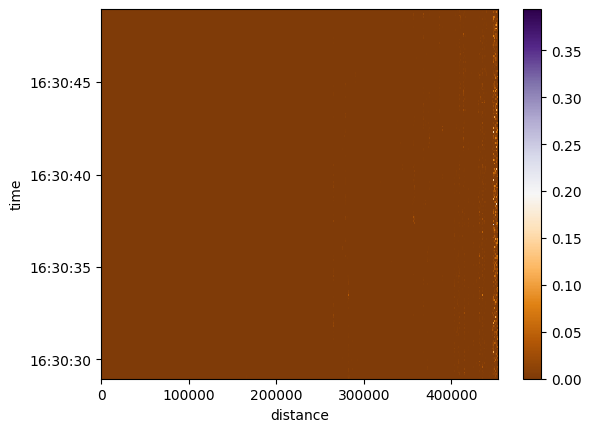

2024-10-15 13:21:28,995 - matplotlib.colorbar - DEBUG - locator: <matplotlib.ticker.AutoLocator object at 0x7f9460041c90>


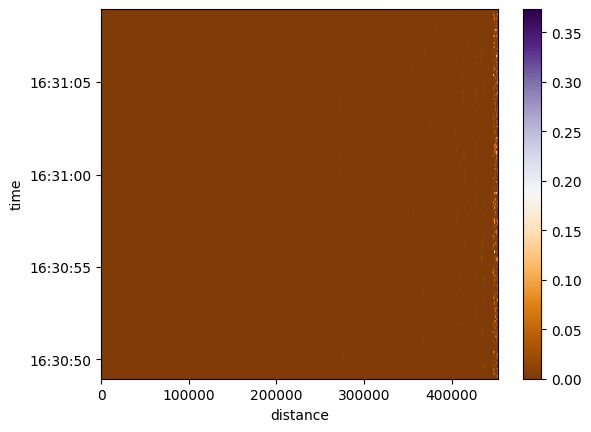

2024-10-15 13:21:29,790 - matplotlib.colorbar - DEBUG - locator: <matplotlib.ticker.AutoLocator object at 0x7f945fe5aa90>


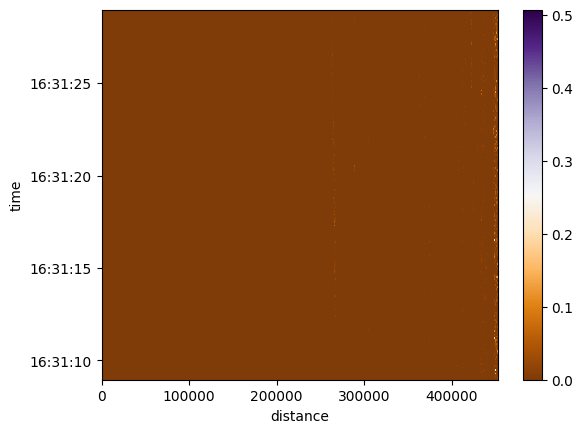

2024-10-15 13:21:30,626 - matplotlib.colorbar - DEBUG - locator: <matplotlib.ticker.AutoLocator object at 0x7f945fe04150>


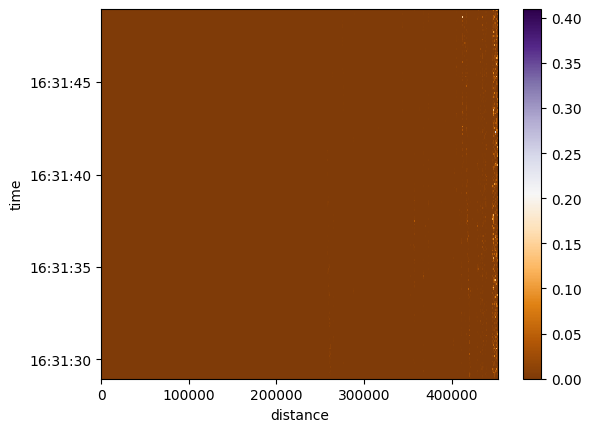

In [15]:
import matplotlib.pyplot as plt
from xdas.processing import DataArrayLoader, process

file_wildcard = "/data_int/deel/2023_07_21_Frep_2kHz_RES_10m/2023_07_21_Frep_2kHz_RES_10m_*.hdf5"
source = xdas_dataarray(file_wildcard=file_wildcard)
dataloader = DataArrayLoader(source[0:10000,:], chunks={"time": 2000})
for chunk in dataloader:
    output_chunk = atom(chunk)
    output_chunk.plot(cmap="PuOr")
    plt.show()

# Writing/Reading your result to disk

In [16]:
# Writing data array
output_chunk.to_netcdf(".data/output_chunk.nc")

2024-10-15 13:21:30,845 - h5py._conv - DEBUG - Creating converter from 5 to 3


2024-10-15 13:21:31,089 - matplotlib.colorbar - DEBUG - locator: <matplotlib.ticker.AutoLocator object at 0x7f945fe5d6d0>


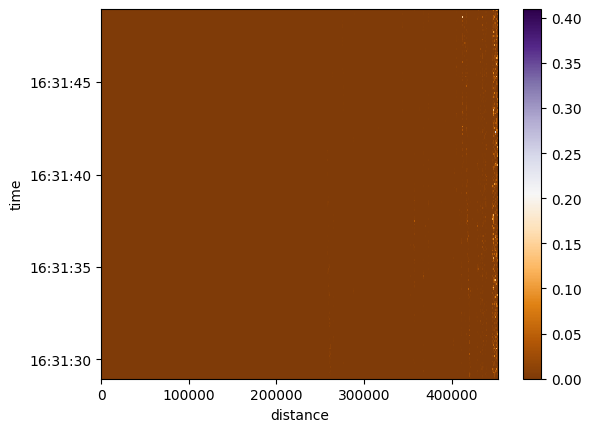

In [17]:
# Reading data array
output_source = xdas.open_dataarray(".data/output_chunk.nc")
output_source.plot(cmap="PuOr")